In [446]:
import wandb
import numpy as np
import itertools
api = wandb.Api()
import wandb
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.cm as cm 
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn import preprocessing

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [447]:
data1 = pd.read_csv('cifar100/005/wandb_export_2020-05-30T13_52_23.553-04_00.csv').replace('undefined',0)
data2 = pd.read_csv('cifar100/005/wandb_export_2020-05-30T13_53_01.332-04_00.csv').replace('undefined',0)
data3 = pd.read_csv('cifar100/005/wandb_export_2020-05-30T13_53_44.056-04_00.csv').replace('undefined',0)


In [448]:
tasks = np.array([0,0,1,1,2,2,2,3,3,4,4,4])
data1['tasks']=tasks
data2['tasks']=tasks
data3['tasks']=tasks
cols = data1.columns
data1[cols] = data1[cols].apply(pd.to_numeric, errors='coerce')
data2[cols] = data2[cols].apply(pd.to_numeric, errors='coerce')
data3[cols] = data3[cols].apply(pd.to_numeric, errors='coerce')
d1 = data1.groupby('tasks')[data1.columns].max()
d2 = data2.groupby('tasks')[data2.columns].max()
d3 = data2.groupby('tasks')[data2.columns].max()


In [449]:
d = pd.concat([d1,d2,d3],axis=1)

d = d.drop('tasks',axis=1)
d = d.drop('Step',axis=1)

In [450]:
mean = d.groupby(by=d.columns, axis=1).mean()
std = d.groupby(by=d.columns, axis=1).std()

In [451]:
data_ = pd.read_csv('cifar100/005_augm/full.csv')#.replace('undefined',0)
cols = [c for c in data_.columns if 'step' not in c and 'task' not in c]
data_= data_[cols]
data_.columns = [''.join([i for i in s.split('-')[0] if not i.isdigit() and not i==' ']) for s in data_.columns]
mean_2 = data_.groupby(by=data_.columns, axis=1).mean()
std_2 = data_.groupby(by=data_.columns, axis=1).std()

In [452]:
mean.columns = ['ict','ict+ewc','simclr','simclr_de','simclr+ewc','simclr_de+ewc','simclr_ict','simclr_ict+ewc','sup','sup+ewc']
std.columns = mean.columns




In [453]:
mean['simclr']=mean_2['simclr']
mean['simclr_de']=mean_2['simclr_de']
mean['simclr+ewc']=mean_2['simclr+ewc']

mean['simclr_de+ewc']=mean_2['simclt_de+ewc']
mean['simclr_ict']=mean_2['simclr_ict']
mean['simclr_ict+ewc']=mean_2['simclr_ict+ewc']


std['simclr']=std_2['simclr']
std['simclr_de']=std_2['simclr_de']
std['simclr+ewc']=std_2['simclr+ewc']

std['simclr_de+ewc']=std_2['simclt_de+ewc']
std['simclr_ict']=std_2['simclr_ict']
std['simclr_ict+ewc']=std_2['simclr_ict+ewc']


In [454]:
mean.columns = ['ict','ict (R)','simclr','simclr+det.','simclr (R)','simclr+det. (R)','simclr+ict','simclr+ict (R)','sup','sup (R)']
std.columns = ['ict','ict (R)','simclr','simclr+det.','simclr (R)','simclr+det. (R)','simclr+ict','simclr+ict (R)','sup','sup (R)']


In [455]:
data_full = pd.read_csv('cifar100/label_cont/005/cifar100_005_full.csv').apply(pd.to_numeric, errors='coerce')
cols = [c for c in data_full.columns if 'step' not in c and 'task' not in c]
data_full= data_full[cols]
data_full.columns = [''.join([i for i in s.split('-')[0] if not i.isdigit() and not i==' ']) for s in data_full.columns]
mean_full = data_full.groupby(by=data_full.columns, axis=1).mean()
std_full = data_full.groupby(by=data_full.columns, axis=1).std()
mean_full.columns = ['ict','ict (R)','simclr','simclr (R)','simclr+det.','simclr+det. (R)','simclr+ict','simclr+ict (R)','sup','sup (R)']
std_full.columns = ['ict','ict (R)','simclr','simclr (R)','simclr+det.','simclr+det. (R)','simclr+ict','simclr+ict (R)','sup','sup (R)']


In [456]:
data_r1 = pd.read_csv('cifar100/005/005_sup_ratio1.csv').apply(pd.to_numeric, errors='coerce')
cols_r1 = [c for c in data_r1.columns if 'step' not in c and 'task' not in c]
data_r1= data_r1[cols_r1]
data_r1.columns = [''.join([i for i in s.split('-')[0] if not i.isdigit() and not i==' ']) for s in data_r1.columns]
mean_r1 = data_r1.groupby(by=data_r1.columns, axis=1).mean()
std_r1 = data_r1.groupby(by=data_r1.columns, axis=1).std()
mean_r1.columns = ['full sup. (R)', 'full sup.']
std_r1.columns = ['full sup. (R)', 'full sup.']

In [457]:
mean_full *=100
mean*=100
std*=100
std_full*=100

mean_r1*=100
std_r1*=100

In [458]:
def plot_(mean, std, ax):
    x = np.arange(len(mean))
    #line_ = {}
    for name in mean.columns:
        if '(R)' in name:
            #c = next(colors)
            #l = next(line)
            c = colors_[name[:-4]]
            l = line_[name[:-4]]
            ax.plot(x,mean[name], color=c, linestyle='-', label=name, linewidth=2)
            ax.fill_between(x, (mean[name]-std_full[name]), (mean[name]+std[name]), color=c, alpha=.12)

    for name in mean.columns:
        if '(R)' not in name:
            c=colors_[name]
            l=line_[name]
            if name=='simclr+det.':
                ax.plot(x,mean[name], color=c, linestyle='--', label=name,linewidth=2) 
            else:
                ax.plot(x,mean[name], color=c, linestyle='--', label=name,linewidth=2) 
            ax.fill_between(x, (mean[name]-std[name]), (mean[name]+std[name]), color=c, alpha=.12)

    for name in mean_r1.columns:
        if '(R)' in name:
            ax.plot(x,mean_r1[name], color='grey', linestyle='-', label=name, linewidth=1)
            ax.fill_between(x, (mean_r1[name]-std_r1[name]), (mean_r1[name]+std_r1[name]), color='grey', alpha=.1)

        if not '(R)' in name:
            ax.plot(x,mean_r1[name], color='grey', linestyle='--', label=name, linewidth=1)
            ax.fill_between(x, (mean_r1[name]-std_r1[name]), (mean_r1[name]+std_r1[name]), color='grey', alpha=.1)
    return ax


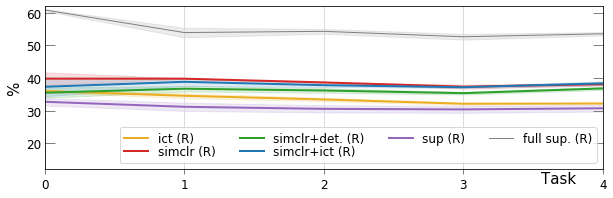

In [335]:
fig = plt.figure(figsize=(10,3))
# Set up Axes
ax = fig.add_subplot(111)
x = np.arange(len(mean))
colors = (n for n in ['#EBAD21','tab:red','tab:green','tab:blue','tab:purple'])
colors_={}
line = (n for n in [(0,(5,5)), (0,(1,1)), '-.', (0,(3,1,1,1,1,1)), '-'])
line_ = {}
for name in mean.columns:
    if '(R)' in name:
        c = next(colors)
        l = next(line)
        colors_[name[:-4]] = c
        line_[name[:-4]] = l
        ax.plot(x,mean[name], color=c, linestyle='-', label=name, linewidth=2)
        ax.fill_between(x, (mean[name]-std[name]), (mean[name]+std[name]), color=c, alpha=.15)



for name in mean_r1.columns:
    if '(R)' in name:
        ax.plot(x,mean_r1[name], color='grey', linestyle='-', label=name, linewidth=1)
        ax.fill_between(x, (mean_r1[name]-std_r1[name]), (mean_r1[name]+std_r1[name]), color='grey', alpha=.15)


ax.legend(fontsize=15)
ax.margins(x=0)
ax.set_ylabel('%', fontsize=15, color='black')
ax.set_xlabel('Task',fontsize=15, color='black')   
plt.xticks([0,1,2,3,4],fontsize=10, color='black') 
plt.yticks(fontsize=10, color='black') 
#ax.set_ylim([55,95])
ax.set_ylim([12,62])
ax.tick_params(axis='x', which='major', width = 1, color='grey',direction='out', length=5, labelsize=12)
ax.tick_params(axis='y', which='major', width = 1, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)


ax.grid(axis='x', color='lightgrey')
ax.legend(fontsize=12, ncol=4, labelspacing=0.05, loc='lower right')
#sb.despine(left=True, bottom=True, right=True)
ax.xaxis.set_label_coords(0.92, -0.01)



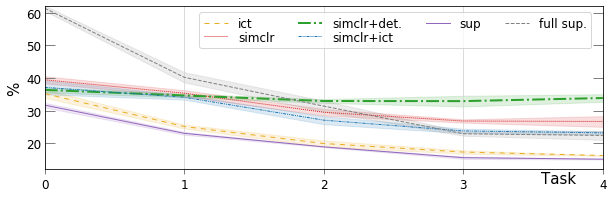

In [319]:
fig = plt.figure(figsize=(10,3))
# Set up Axes
ax = fig.add_subplot(111)
x = np.arange(len(mean))

for name in mean.columns:
    if '(R)' not in name:
        c=colors_[name]
        l=line_[name]
        if name=='simclr+det.':
            ax.plot(x,mean[name], color=c, linestyle=l, label=name,linewidth=2) 
        else:
            ax.plot(x,mean[name], color=c, linestyle=l, label=name,linewidth=1) 
        ax.fill_between(x, (mean[name]-std[name]), (mean[name]+std[name]), color=c, alpha=.15)


for name in mean_r1.columns:
    if not '(R)' in name:
        ax.plot(x,mean_r1[name], color='grey', linestyle='--', label=name, linewidth=1)
        ax.fill_between(x, (mean_r1[name]-std_r1[name]), (mean_r1[name]+std_r1[name]), color='grey', alpha=.15)


ax.legend(fontsize=15)
ax.margins(x=0)
ax.set_ylabel('%', fontsize=15, color='black')
ax.set_xlabel('Task',fontsize=15, color='black')   
plt.xticks([0,1,2,3,4],fontsize=10, color='black') 
plt.yticks(fontsize=10, color='black') 
#ax.set_ylim([55,95])
ax.set_ylim([12,62])
ax.tick_params(axis='x', which='major', width = 1, color='grey',direction='out', length=5, labelsize=12)
ax.tick_params(axis='y', which='major', width = 1, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)


ax.grid(axis='x', color='lightgrey')
ax.legend(fontsize=12, ncol=4, labelspacing=0.05, bbox_to_anchor=(0.99, 1), loc='upper right')
#sb.despine(left=True, bottom=True, right=True)
ax.xaxis.set_label_coords(0.92, -0.01)



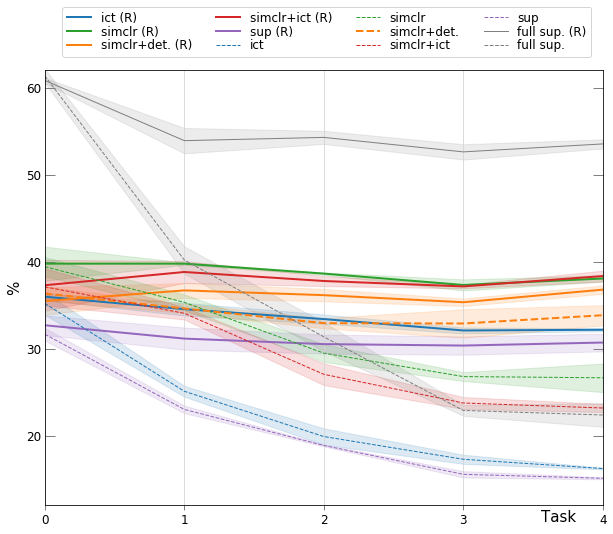

In [373]:
fig = plt.figure(figsize=(10,8))
# Set up Axes
ax = fig.add_subplot(111)
x = np.arange(len(mean))
colors = (n for n in ['tab:blue','tab:green','tab:orange','tab:red','tab:purple'])
colors_={}
line = (n for n in [(0,(5,5)), (0,(1,1)), '-.', (0,(3,1,1,1,1,1)), '-'])
line_ = {}
for name in mean.columns:
    if '(R)' in name:
        c = next(colors)
        l = next(line)
        colors_[name[:-4]] = c
        line_[name[:-4]] = l
        ax.plot(x,mean[name], color=c, linestyle='-', label=name, linewidth=2)
        ax.fill_between(x, (mean[name]-std[name]), (mean[name]+std[name]), color=c, alpha=.15)

for name in mean.columns:
    if '(R)' not in name:
        c=colors_[name]
        l=line_[name]
        if name=='simclr+det.':
            ax.plot(x,mean[name], color=c, linestyle='--', label=name,linewidth=2) 
        else:
            ax.plot(x,mean[name], color=c, linestyle='--', label=name,linewidth=1) 
        ax.fill_between(x, (mean[name]-std[name]), (mean[name]+std[name]), color=c, alpha=.15)

for name in mean_r1.columns:
    if '(R)' in name:
        ax.plot(x,mean_r1[name], color='grey', linestyle='-', label=name, linewidth=1)
        ax.fill_between(x, (mean_r1[name]-std_r1[name]), (mean_r1[name]+std_r1[name]), color='grey', alpha=.15)
    if not '(R)' in name:
        ax.plot(x,mean_r1[name], color='grey', linestyle='--', label=name, linewidth=1)
        ax.fill_between(x, (mean_r1[name]-std_r1[name]), (mean_r1[name]+std_r1[name]), color='grey', alpha=.15)

ax.legend(fontsize=15)
ax.margins(x=0)
ax.set_ylabel('%', fontsize=15, color='black')
ax.set_xlabel('Task',fontsize=15, color='black')   
plt.xticks([0,1,2,3,4],fontsize=10, color='black') 
plt.yticks(fontsize=10, color='black') 
#ax.set_ylim([55,95])
ax.set_ylim([12,62])
ax.tick_params(axis='x', which='major', width = 1, color='grey',direction='out', length=5, labelsize=12)
ax.tick_params(axis='y', which='major', width = 1, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)


ax.grid(axis='x', color='lightgrey')
ax.legend(fontsize=12, ncol=4, labelspacing=0.05, bbox_to_anchor=(0.99, 1.16), loc='upper right')
#sb.despine(left=True, bottom=True, right=True)
ax.xaxis.set_label_coords(0.92, -0.01)




# inset axes....
#subset = 10
#axins = ax.inset_axes([0.3, 0.58, 0.17, 0.40])
#for name in mean.columns:
#    if '(R)' in name:
#        c=colors_[name[:-4]]
#        l=line_[name[:-4]]
#        axins.plot(x[:subset],mean[name][:subset], color=c, linestyle='-', label=name, linewidth=2)
#        #axins.fill_between(x[:subset], (mean[name][:subset]-std[name][:subset]), (mean[name][:subset]+std[name][:subset]), color=c, alpha=.15)
#
#for name in mean.columns:
#    if '(R)' not in name:
#        c=colors_[name]
#        l=line_[name]
#        if name=='simclr+det.':
#            axins.plot(x[:subset],mean_full[name][:subset], color=c, linestyle='--', label=name,linewidth=2) 
#        else:
#            axins.plot(x[:subset],mean[name][:subset], color=c, linestyle='--', label=name,linewidth=1)
#        #axins.fill_between(x[:subset], (mean[name][:subset]-std[name][:subset]), (mean[name][:subset]+std[name][:subset]), color=c, alpha=.15)


#axins.imshow(Z2, extent=extent, interpolation="nearest",
#          origin="lower")
# sub region of the original image
#x1, x2, y1, y2 = 0, 0.2, 30, 40.5
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)
#axins.set_xticklabels('')
##axins.set_yticklabels([30,40])
#axins.tick_params(axis='x', which='major', width = 0, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)
#axins.tick_params(axis='y', which='minor', width = 1, color='grey',direction='in', length=5, labelsize=5, right=False)#, labelright=True)
#ax.indicate_inset_zoom(axins)
plt.show()


In [324]:
colors_

{'ict': 'tab:blue',
 'simclr': 'tab:green',
 'simclr+det.': 'tab:orange',
 'simclr+ict': 'tab:red',
 'sup': 'tab:purple'}

In [325]:
fig.savefig('/Users/oleksostapenko/Projects/SSCL/notebooks/plots/005/005_ewc_noewc_inser.pdf', bbox_inches='tight', format='pdf', dpi=300)

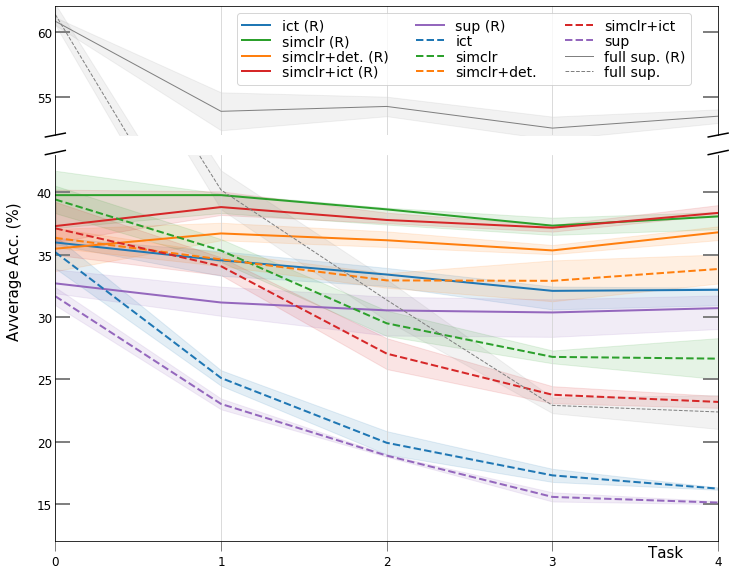

In [459]:

# Set up Axes
#ax = fig.add_subplot(111)
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]}, figsize=(10,8))
fig.tight_layout(pad=1.0)
# plot the same data on both axes
ax = plot_(mean,std,ax)
ax2 = plot_(mean,std,ax2)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(52.1, 62)  # outliers only
ax2.set_ylim(12, 43)  # most of the data
# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1.016 - d, 0.997 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1.016 - d, 0.997 + d), **kwargs)  # bottom-right diagonal


ax.margins(x=0)
ax2.set_ylabel('Avverage Acc. (%)', fontsize=15, color='black')
ax2.set_xlabel('Task',fontsize=15, color='black') 

plt.xticks([0,1,2,3,4],fontsize=10, color='black') 


ax.tick_params(axis='x', which='major', width = 1, color='grey',direction='out', length=6, labelsize=12, top=False)
ax.tick_params(axis='y', which='major', width = 2, color='grey',direction='in', length=15, labelsize=12, right=True)#, labelright=True)
ax2.tick_params(axis='y', which='major', width = 2, color='grey',direction='in', length=15, labelsize=12, right=True)#, labelright=True)
ax2.tick_params(axis='x', which='major', width = 1, color='grey',direction='out', length=10, labelsize=12, right=True)#, labelright=True)



ax.grid(axis='x', color='lightgrey')
ax2.grid(axis='x', color='lightgrey')

ax.yaxis.set_major_locator(MaxNLocator(2,integer=True))
ax2.yaxis.set_major_locator(MaxNLocator(7, integer=True))

ax.legend(fontsize=14, ncol=3, labelspacing=0.1, bbox_to_anchor=(0.97, 1), loc='upper right')
#sb.despine(left=True, bottom=True, right=True)
ax2.yaxis.set_label_coords(-0.05, 0.7)
ax2.xaxis.set_label_coords(0.92, -0.01)





plt.show()


In [ ]:
# inset axes....
subset = 10
axins = ax2.inset_axes([0.08, 0.02, 0.12, 0.55])
for name in mean_full.columns:
    if '(R)' in name:
        c=colors_[name[:-4]]
        l=line_[name[:-4]]
        axins.plot(x[:subset],mean[name][:subset], color=c, linestyle='-', label=name, linewidth=2)
        #axins.fill_between(x[:subset], (mean[name][:subset]-std[name][:subset]), (mean[name][:subset]+std[name][:subset]), color=c, alpha=.15)

for name in mean_full.columns:
    if '(R)' not in name:
        c=colors_[name]
        l=line_[name]
        if name=='simclr+det.':
            axins.plot(x[:subset],mean[name][:subset], color=c, linestyle='--', label=name,linewidth=2) 
        else:
            axins.plot(x[:subset],mean[name][:subset], color=c, linestyle='--', label=name,linewidth=1)
        #axins.fill_between(x[:subset], (mean[name][:subset]-std[name][:subset]), (mean[name][:subset]+std[name][:subset]), color=c, alpha=.15)
        

#axins.imshow(Z2, extent=extent, interpolation="nearest",
#          origin="lower")
# sub region of the original image
x1, x2, y1, y2 = 0, 0.2, 31, 40
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
#axins.set_yticklabels([30,40])
axins.tick_params(axis='x', which='major', width = 0, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)
axins.tick_params(axis='y', which='minor', width = 1, color='grey',direction='out', length=5, labelsize=3, right=False)#, labelright=True)
axins.yaxis.set_major_locator(MaxNLocator(4, integer=True))

ax2.indicate_inset_zoom(axins)




In [460]:
fig.savefig('/Users/oleksostapenko/Projects/SSCL/notebooks/plots/005/005_ewc_noewc_inser.pdf', bbox_inches='tight', format='pdf', dpi=300)

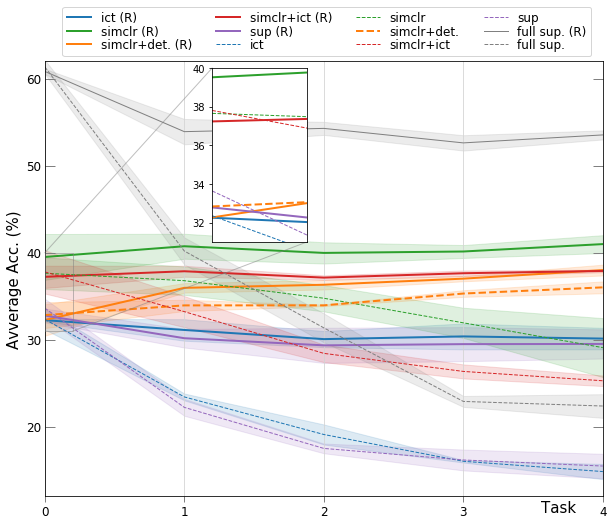

In [461]:
fig = plt.figure(figsize=(10,8))
# Set up Axes
ax = fig.add_subplot(111)
x = np.arange(len(mean_full))
colors = (n for n in ['tab:orange','tab:red','tab:green','tab:blue','tab:purple'])
#colors_={}
line = (n for n in [(0,(5,5)), (0,(1,1)), '-.', (0,(3,1,1,1,1,1)), '-'])
#line_ = {}
for name in mean_full.columns:
    if '(R)' in name:
        #c = next(colors)
        #l = next(line)
        c = colors_[name[:-4]]
        l = line_[name[:-4]]
        ax.plot(x,mean_full[name], color=c, linestyle='-', label=name, linewidth=2)
        ax.fill_between(x, (mean_full[name]-std_full[name]), (mean_full[name]+std_full[name]), color=c, alpha=.15)

for name in mean_full.columns:
    if '(R)' not in name:
        c=colors_[name]
        l=line_[name]
        if name=='simclr+det.':
            ax.plot(x,mean_full[name], color=c, linestyle='--', label=name,linewidth=2) 
        else:
            ax.plot(x,mean_full[name], color=c, linestyle='--', label=name,linewidth=1) 
        ax.fill_between(x, (mean_full[name]-std_full[name]), (mean_full[name]+std_full[name]), color=c, alpha=.15)

for name in mean_r1.columns:
    if '(R)' in name:
        ax.plot(x,mean_r1[name], color='grey', linestyle='-', label=name, linewidth=1)
        ax.fill_between(x, (mean_r1[name]-std_r1[name]), (mean_r1[name]+std_r1[name]), color='grey', alpha=.15)

    if not '(R)' in name:
        ax.plot(x,mean_r1[name], color='grey', linestyle='--', label=name, linewidth=1)
        ax.fill_between(x, (mean_r1[name]-std_r1[name]), (mean_r1[name]+std_r1[name]), color='grey', alpha=.15)

ax.legend(fontsize=15)
ax.margins(x=0)
ax.set_ylabel('Avverage Acc. (%)', fontsize=15, color='black')
ax.set_xlabel('Task',fontsize=15, color='black')   
plt.xticks([0,1,2,3,4],fontsize=10, color='black') 
plt.yticks(fontsize=10, color='black') 
ax.set_ylim([12,62])
ax.tick_params(axis='x', which='major', width = 1, color='grey',direction='out', length=6, labelsize=12)
ax.tick_params(axis='y', which='major', width = 1, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)


ax.grid(axis='x', color='lightgrey')
ax.legend(fontsize=12, ncol=4, labelspacing=0.05, bbox_to_anchor=(0.99, 1.14), loc='upper right')
#sb.despine(left=True, bottom=True, right=True)
ax.xaxis.set_label_coords(0.92, -0.01)




# inset axes....
subset = 10
axins = ax.inset_axes([0.3, 0.585, 0.17, 0.40])
for name in mean_full.columns:
    if '(R)' in name:
        c=colors_[name[:-4]]
        l=line_[name[:-4]]
        axins.plot(x[:subset],mean_full[name][:subset], color=c, linestyle='-', label=name, linewidth=2)
        #axins.fill_between(x[:subset], (mean[name][:subset]-std[name][:subset]), (mean[name][:subset]+std[name][:subset]), color=c, alpha=.15)

for name in mean_full.columns:
    if '(R)' not in name:
        c=colors_[name]
        l=line_[name]
        if name=='simclr+det.':
            axins.plot(x[:subset],mean_full[name][:subset], color=c, linestyle='--', label=name,linewidth=2) 
        else:
            axins.plot(x[:subset],mean_full[name][:subset], color=c, linestyle='--', label=name,linewidth=1)
        #axins.fill_between(x[:subset], (mean[name][:subset]-std[name][:subset]), (mean[name][:subset]+std[name][:subset]), color=c, alpha=.15)
        

#axins.imshow(Z2, extent=extent, interpolation="nearest",
#          origin="lower")
# sub region of the original image
x1, x2, y1, y2 = 0, 0.2, 31, 40
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
#axins.set_yticklabels([30,40])
axins.tick_params(axis='x', which='major', width = 0, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)
axins.tick_params(axis='y', which='minor', width = 1, color='grey',direction='out', length=5, labelsize=5, right=False)#, labelright=True)

ax.indicate_inset_zoom(axins)

plt.show()


In [116]:
fig.savefig('/Users/oleksostapenko/Projects/SSCL/notebooks/plots/005_label_cont/005_ewc_noewc_inser_lc.pdf', bbox_inches='tight', format='pdf', dpi=300)

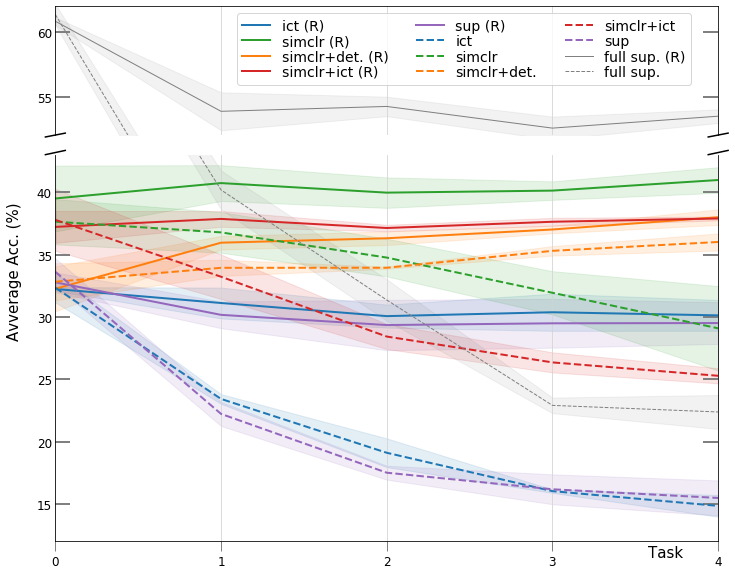

In [462]:

# Set up Axes
#ax = fig.add_subplot(111)
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]}, figsize=(10,8))
fig.tight_layout(pad=1.0)

# plot the same data on both axes
ax = plot_(mean_full, std_full,ax)
ax2 = plot_(mean_full, std_full,ax2)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(52.1, 62)  # outliers only
ax2.set_ylim(12, 43)  # most of the data
# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1.016 - d, 0.997 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1.016 - d, 0.997 + d), **kwargs)  # bottom-right diagonal


ax.margins(x=0)
ax2.set_ylabel('Avverage Acc. (%)', fontsize=15, color='black')
ax2.set_xlabel('Task',fontsize=15, color='black') 

plt.xticks([0,1,2,3,4],fontsize=10, color='black') 


ax.tick_params(axis='x', which='major', width = 1, color='grey',direction='out', length=6, labelsize=12)
ax.tick_params(axis='x', which='major', width = 1, color='grey',direction='out', length=6, labelsize=12, top=False)
ax.tick_params(axis='y', which='major', width = 2, color='grey',direction='in', length=15, labelsize=12, right=True)#, labelright=True)
ax2.tick_params(axis='y', which='major', width = 2, color='grey',direction='in', length=15, labelsize=12, right=True)#, labelright=True)
ax2.tick_params(axis='x', which='major', width = 1, color='grey',direction='out', length=10, labelsize=12, right=True)#, labelright=True)


ax.grid(axis='x', color='lightgrey')
ax2.grid(axis='x', color='lightgrey')

ax.yaxis.set_major_locator(MaxNLocator(2,integer=True))
ax2.yaxis.set_major_locator(MaxNLocator(7, integer=True))

ax.legend(fontsize=14, ncol=3, labelspacing=0.1, bbox_to_anchor=(0.97, 1), loc='upper right')
#sb.despine(left=True, bottom=True, right=True)
ax2.yaxis.set_label_coords(-0.05, 0.7)
ax2.xaxis.set_label_coords(0.92, -0.01)




plt.show()


In [ ]:

# inset axes....
subset = 10
axins = ax2.inset_axes([0.08, 0.02, 0.12, 0.55])
for name in mean_full.columns:
    if '(R)' in name:
        c=colors_[name[:-4]]
        l=line_[name[:-4]]
        axins.plot(x[:subset],mean_full[name][:subset], color=c, linestyle='-', label=name, linewidth=2)
        #axins.fill_between(x[:subset], (mean[name][:subset]-std[name][:subset]), (mean[name][:subset]+std[name][:subset]), color=c, alpha=.15)

for name in mean_full.columns:
    if '(R)' not in name:
        c=colors_[name]
        l=line_[name]
        if name=='simclr+det.':
            axins.plot(x[:subset],mean_full[name][:subset], color=c, linestyle='--', label=name,linewidth=2) 
        else:
            axins.plot(x[:subset],mean_full[name][:subset], color=c, linestyle='--', label=name,linewidth=1)
        #axins.fill_between(x[:subset], (mean[name][:subset]-std[name][:subset]), (mean[name][:subset]+std[name][:subset]), color=c, alpha=.15)
        

#axins.imshow(Z2, extent=extent, interpolation="nearest",
#          origin="lower")
# sub region of the original image
x1, x2, y1, y2 = 0, 0.2, 31, 40
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
#axins.set_yticklabels([30,40])
axins.tick_params(axis='x', which='major', width = 0, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)
axins.tick_params(axis='y', which='minor', width = 1, color='grey',direction='out', length=5, labelsize=3, right=False)#, labelright=True)
axins.yaxis.set_major_locator(MaxNLocator(4, integer=True))

ax2.indicate_inset_zoom(axins)


In [463]:
fig.savefig('/Users/oleksostapenko/Projects/SSCL/notebooks/plots/005_label_cont/005_ewc_noewc_inser_lc.pdf', bbox_inches='tight', format='pdf', dpi=300)

In [ ]:


ax.legend(fontsize=15)
ax.margins(x=0)
ax.set_ylabel('%', fontsize=15, color='black')
ax.set_xlabel('Task',fontsize=15, color='black')   
plt.xticks([0,1,2,3,4],fontsize=10, color='black') 
plt.yticks(fontsize=10, color='black') 
ax.set_ylim([12,62])
ax.tick_params(axis='x', which='major', width = 1, color='grey',direction='out', length=6, labelsize=12)
ax.tick_params(axis='y', which='major', width = 1, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)


ax.grid(axis='x', color='lightgrey')
ax.legend(fontsize=12, ncol=4, labelspacing=0.05, bbox_to_anchor=(0.99, 1.14), loc='upper right')
#sb.despine(left=True, bottom=True, right=True)
ax.xaxis.set_label_coords(0.92, -0.01)




# inset axes....
subset = 10
axins = ax.inset_axes([0.3, 0.585, 0.17, 0.40])
for name in mean_full.columns:
    if '(R)' in name:
        c=colors_[name[:-4]]
        l=line_[name[:-4]]
        axins.plot(x[:subset],mean_full[name][:subset], color=c, linestyle='-', label=name, linewidth=2)
        #axins.fill_between(x[:subset], (mean[name][:subset]-std[name][:subset]), (mean[name][:subset]+std[name][:subset]), color=c, alpha=.15)

for name in mean_full.columns:
    if '(R)' not in name:
        c=colors_[name]
        l=line_[name]
        if name=='simclr+det.':
            axins.plot(x[:subset],mean_full[name][:subset], color=c, linestyle='--', label=name,linewidth=2) 
        else:
            axins.plot(x[:subset],mean_full[name][:subset], color=c, linestyle='--', label=name,linewidth=1)
        #axins.fill_between(x[:subset], (mean[name][:subset]-std[name][:subset]), (mean[name][:subset]+std[name][:subset]), color=c, alpha=.15)
        

#axins.imshow(Z2, extent=extent, interpolation="nearest",
#          origin="lower")
# sub region of the original image
x1, x2, y1, y2 = 0, 0.2, 31, 40
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
#axins.set_yticklabels([30,40])
axins.tick_params(axis='x', which='major', width = 0, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)
axins.tick_params(axis='y', which='minor', width = 1, color='grey',direction='out', length=5, labelsize=5, right=False)#, labelright=True)

ax.indicate_inset_zoom(axins)

plt.show()


In [71]:
mean

,ict,ict (R),simclr,simclr+det.,simclr (R),simclr+det. (R),simclr+ict,simclr+ict (R),sup,sup (R)
tasks,,,,,,,,,,
0,35.200000,35.983333,39.433333,36.350000,39.783334,35.483332,37.116667,37.300001,31.666666,32.700000
1,25.108333,34.550001,35.333333,34.625001,39.783334,36.708334,34.075000,38.825000,23.025000,31.166667
2,19.905556,33.411111,29.494445,32.938890,38.638889,36.161111,27.061111,37.788890,18.877778,30.533334
3,17.291667,32.100001,26.800001,32.904167,37.333333,35.345834,23.762500,37.166667,15.562500,30.366666
4,16.226667,32.183334,26.660000,33.853334,38.073333,36.796667,23.186667,38.356667,15.106667,30.713333


In [68]:
std

,ict,ict (R),simclr,simclr+det.,simclr (R),simclr+det. (R),simclr+ict,simclr+ict (R),sup,sup (R)
tasks,,,,,,,,,,
0,1.299037,0.375276,1.101515,0.785812,1.955335,1.588501,2.123872,2.925321,0.721687,1.125832
1,0.620651,0.736122,0.917311,0.532096,0.128290,0.857807,0.714580,1.264169,0.433012,1.270171
2,0.933383,0.529237,1.017941,0.583652,0.134714,0.710307,1.241227,0.585314,0.096225,1.096965
3,0.526833,0.346411,0.514326,1.637325,0.639498,0.432351,0.685109,0.222323,0.368061,1.053664
4,0.092376,0.167432,1.645388,1.164231,0.361155,0.481698,0.474376,0.625166,0.115470,1.016136


In [69]:
mean_full

,ict,ict (R),simclr,simclr (R),simclr+det.,simclr+det. (R),simclr+ict,simclr+ict (R),sup,sup (R)
0,32.350001,32.250000,37.650000,39.516667,32.833334,32.266666,37.800000,37.233333,33.633334,32.783334
1,23.425000,31.125000,36.791666,40.750001,33.950000,35.966666,33.233334,37.875000,22.225000,30.174999
2,19.105556,30.072222,34.772223,39.983333,33.955556,36.322222,28.433334,37.144444,17.505556,29.355556
3,16.025000,30.383334,31.945834,40.145834,35.312500,37.025000,26.358333,37.645834,16.175000,29.495832
4,14.843333,30.133334,29.093333,40.996667,36.023333,38.010000,25.283333,37.909999,15.480000,29.516667


In [72]:
std_full

,ict,ict (R),simclr,simclr (R),simclr+det.,simclr+det. (R),simclr+ict,simclr+ict (R),sup,sup (R)
0,1.175797,0.150000,1.818653,2.639287,1.485204,1.805778,2.486462,1.278997,1.077420,0.797392
1,0.390512,1.239204,1.631207,1.436358,0.648556,0.545626,1.784891,0.630972,0.968568,1.069754
2,1.153538,0.925013,1.510733,1.222135,0.083887,0.543736,1.004296,0.258379,0.558354,2.020473
3,0.137500,1.491452,1.733959,0.742076,0.381404,0.304138,0.805870,0.313832,1.199675,1.958648
4,0.873231,1.237106,3.393234,1.026856,0.684788,0.622174,0.606987,0.153949,1.405667,1.676555


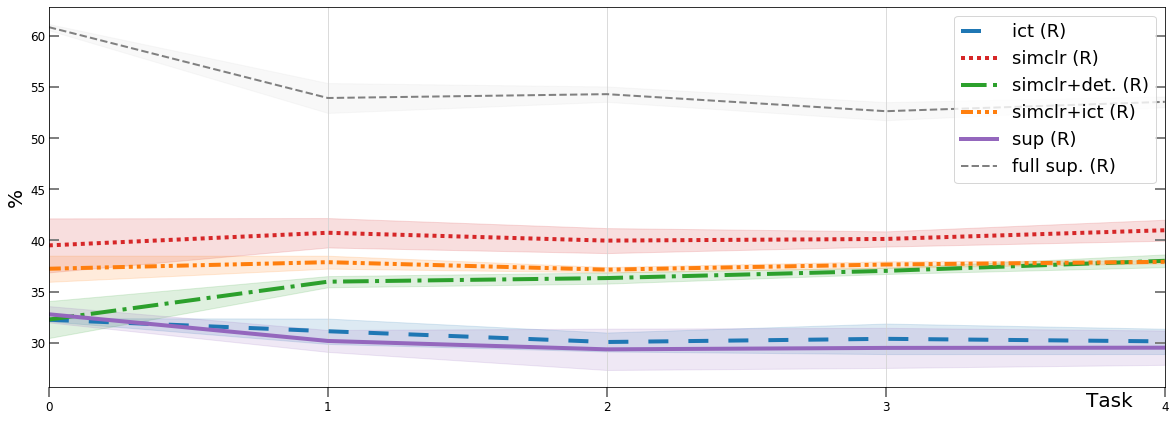

In [26]:
fig = plt.figure(figsize=(20,7))
# Set up Axes
ax = fig.add_subplot(111)
x = np.arange(len(mean))
for name in mean_full.columns:
    if '(R)' in name:
        c = colors_[name[:-4]]
        l = line_[name[:-4]]
        ax.plot(x,mean_full[name], color=c, linestyle=l, label=name, linewidth=4)
        ax.fill_between(x, (mean_full[name]-std_full[name]), (mean_full[name]+std_full[name]), color=c, alpha=.15)

for name in mean_r1.columns:
    if '(R)' in name:
        ax.plot(x,mean_r1[name], color='grey', linestyle='--', label=name, linewidth=2)
        ax.fill_between(x, (mean_r1[name]-std_r1[name]), (mean_r1[name]+std_r1[name]), color='lightgrey', alpha=.15)
        
  
ax.legend(fontsize=15)
ax.margins(x=0)
ax.set_ylabel('%', fontsize=20, color='black')
ax.set_xlabel('Task',fontsize=20, color='black')   
plt.xticks([0,1,2,3,4],fontsize=10, color='black') 
plt.yticks(fontsize=10, color='black') 
#ax.set_ylim([55,95])
ax.tick_params(axis='x', which='major', width = 2, color='grey',direction='out', length=10, labelsize=12)
ax.tick_params(axis='y', which='major', width = 2, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)


ax.grid(axis='x', color='lightgrey')
ax.legend(fontsize=18)
#sb.despine(left=True, bottom=True, right=True)
ax.xaxis.set_label_coords(0.95, -0.01)


In [27]:
fig.savefig('/Users/oleksostapenko/Projects/SSCL/notebooks/plots/005_label_cont/005_ewc_full.pdf', bbox_inches='tight', format='pdf', dpi=300)

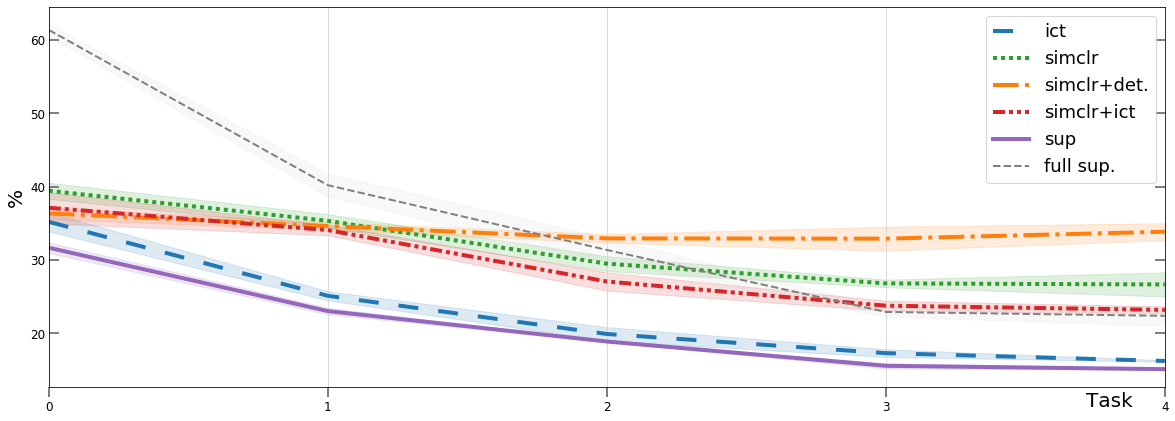

In [1739]:
fig = plt.figure(figsize=(20,7))
# Set up Axes
ax = fig.add_subplot(111)
x = np.arange(len(mean))         
#colors = iter(cm.rainbow(np.linspace(0, 1, len(mean.columns))))
for name in mean.columns:
    if '(R)' not in name:
        c=colors_[name]
        l=line_[name]
        ax.plot(x,mean[name], color=c, linestyle=l, label=name,linewidth=4) 
        ax.fill_between(x, (mean[name]-std[name]), (mean[name]+std[name]), color=c, alpha=.15)

        
for name in mean_r1.columns:
    if not '(R)' in name:
        ax.plot(x,mean_r1[name], color='grey', linestyle='--', label=name, linewidth=2)
        ax.fill_between(x, (mean_r1[name]-std_r1[name]), (mean_r1[name]+std_r1[name]), color='lightgrey', alpha=.15)
        
  
ax.legend(fontsize=15)
ax.margins(x=0)
ax.set_ylabel('%', fontsize=20, color='black')
ax.set_xlabel('Task',fontsize=20, color='black')   
plt.xticks([0,1,2,3,4],fontsize=10, color='black') 
plt.yticks(fontsize=10, color='black') 
#ax.set_ylim([55,95])
ax.tick_params(axis='x', which='major', width = 2, color='grey',direction='out', length=10, labelsize=12)
ax.tick_params(axis='y', which='major', width = 2, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)


ax.grid(axis='x', color='lightgrey')
ax.legend(fontsize=18)
#sb.despine(left=True, bottom=True, right=True)
ax.xaxis.set_label_coords(0.95, -0.01)


In [1740]:
fig.savefig('/Users/oleksostapenko/Projects/SSCL/notebooks/plots/005/005_.pdf', bbox_inches='tight', format='pdf', dpi=300)

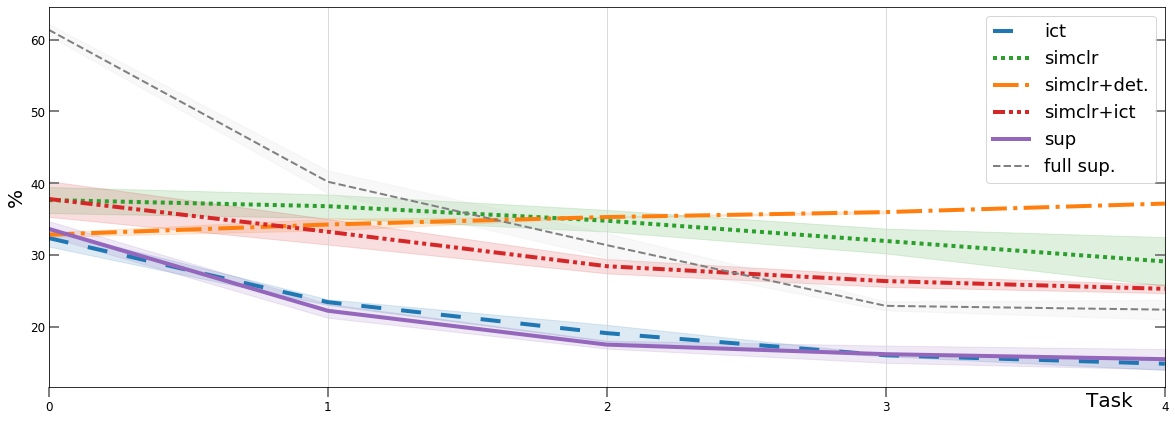

In [1741]:
fig = plt.figure(figsize=(20,7))
# Set up Axes
ax = fig.add_subplot(111)
x = np.arange(len(mean_full))         
#colors = iter(cm.rainbow(np.linspace(0, 1, len(mean.columns))))
for name in mean_full.columns:
    if '(R)' not in name:
        c=colors_[name]
        l=line_[name]
        ax.plot(x,mean_full[name], color=c, linestyle=l, label=name, linewidth=4)
        ax.fill_between(x, (mean_full[name]-std_full[name]), (mean_full[name]+std_full[name]), color=c, alpha=.15)

for name in mean_r1.columns:
    if not '(R)' in name:
        ax.plot(x,mean_r1[name], color='grey', linestyle='--', label=name, linewidth=2)   
        ax.fill_between(x, (mean_r1[name]-std_r1[name]), (mean_r1[name]+std_r1[name]), color='lightgrey', alpha=.15)


ax.margins(x=0)
ax.set_ylabel('%', fontsize=20, color='black')
ax.set_xlabel('Task',fontsize=20, color='black')   
plt.xticks([0,1,2,3,4],fontsize=10, color='black') 
plt.yticks(fontsize=10, color='black') 
#ax.set_ylim([55,95])
ax.tick_params(axis='x', which='major', width = 2, color='grey',direction='out', length=10, labelsize=12)
ax.tick_params(axis='y', which='major', width = 2, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)


ax.grid(axis='x', color='lightgrey')
ax.legend(fontsize=18)
#sb.despine(left=True, bottom=True, right=True)
ax.xaxis.set_label_coords(0.95, -0.01)


In [1742]:
fig.savefig('/Users/oleksostapenko/Projects/SSCL/notebooks/plots/005_label_cont/005_full.pdf', bbox_inches='tight', format='pdf', dpi=300)

In [1421]:
data1 = pd.read_csv('005/005_t0_acc_1.csv').replace('undefined',0)
data2 = pd.read_csv('005/005_t0_acc_2.csv').replace('undefined',0)
data3 = pd.read_csv('005/005_t0_acc_3.csv').replace('undefined',0)


FileNotFoundError: [Errno 2] File 005/005_t0_acc_1.csv does not exist: '005/005_t0_acc_1.csv'

In [1352]:
tasks = np.array([0,0,1,1,2,2,2,3,3,4,4,4])
data1['tasks']=tasks
data2['tasks']=tasks
data3['tasks']=tasks
cols = data1.columns
data1[cols] = data1[cols].apply(pd.to_numeric, errors='coerce')
data2[cols] = data2[cols].apply(pd.to_numeric, errors='coerce')
data3[cols] = data3[cols].apply(pd.to_numeric, errors='coerce')
d1 = data1.groupby('tasks')[data1.columns].max()
d2 = data2.groupby('tasks')[data2.columns].max()
d3 = data2.groupby('tasks')[data2.columns].max()


In [816]:
d = pd.concat([d1,d2,d3],axis=1)

d = d.drop('tasks',axis=1)
d = d.drop('Step',axis=1)

In [817]:
mean = d.groupby(by=d.columns, axis=1).mean()
std = d.groupby(by=d.columns, axis=1).std()

In [818]:
mean.columns

Index(['Name: ict_acc_metric_3 - Task_losses/Task0/metrics/supervised/accuracy',
       'Name: ict_ewc_acc_metric - Task_losses/Task0/metrics/supervised/accuracy',
       'Name: simclr_accmetr - Task_losses/Task0/metrics/supervised/accuracy',
       'Name: simclr_etached_accmetr - Task_losses/Task0/metrics/supervised/accuracy',
       'Name: simclr_ewc_accmetr - Task_losses/Task0/metrics/supervised/accuracy',
       'Name: simclr_ewc_detached_accmetr - Task_losses/Task0/metrics/supervised/accuracy',
       'Name: simclr_ict_accmetr - Task_losses/Task0/metrics/supervised/accuracy',
       'Name: simclr_ict_ewc_accmetr - Task_losses/Task0/metrics/supervised/accuracy',
       'Name: sup_accmetr - Task_losses/Task0/metrics/supervised/accuracy',
       'Name: sup_ewc_accmetr - Task_losses/Task0/metrics/supervised/accuracy'],
      dtype='object')

In [1586]:
mean.columns = ['ict','ict+ewc','simclr','simclr_de','simclr+ewc','simclr_de+ewc','simclr_ict','simclr_ict+ewc','sup','sup+ewc']
std.columns = mean.columns




KeyError: 'simclr_de'

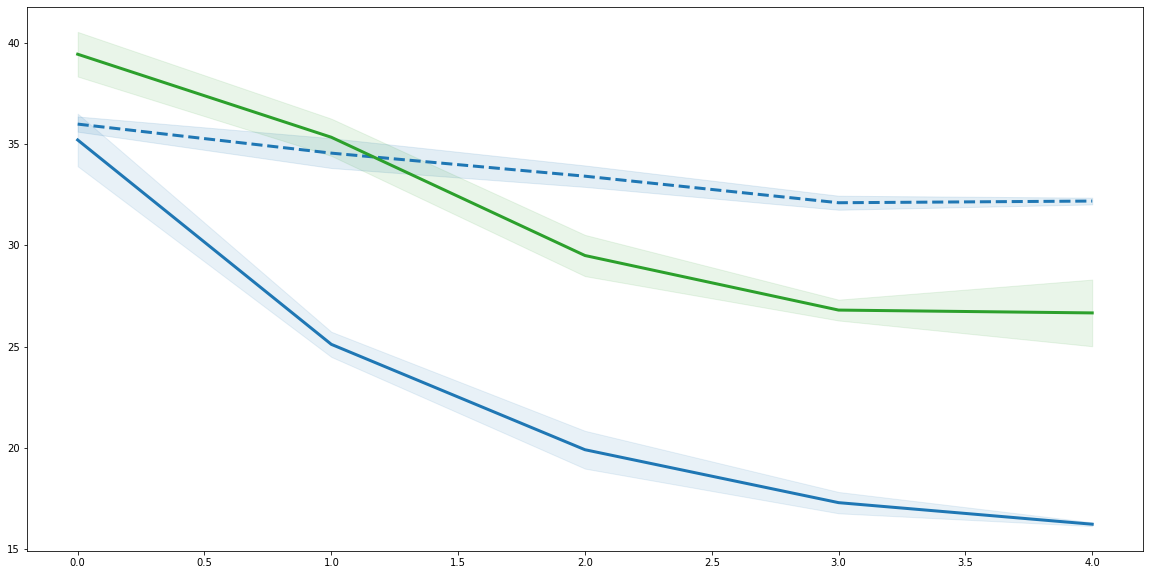

In [1587]:
fig = plt.figure(figsize=(20,10))
# Set up Axes
ax = fig.add_subplot(111)
x = np.arange(len(mean))
#colors = (n for n in ['tab:blue','tab:green','tab:orange','tab:red','tab:purple'])
#colors_={}
#line = (n for n in [(0,(5,5)), (0,(1,1)), (0,(3,10,1,10)), (0,(3,1,1,1,1,1)), '-'])
#line_ = {}
for name in mean.columns:
    if 'ewc' in name:
        c=colors_[name[:-4]]
        l=line_[name[:-4]]
        ax.plot(x,mean[name], color=c, linestyle='--', label=name,linewidth=3)
        ax.fill_between(x, (mean[name]-std[name]), (mean[name]+std[name]), color=c, alpha=.12)
    if 'ewc' not in name:
        c=colors_[name]
        l=line_[name]
        ax.plot(x,mean[name], color=c, linestyle='-', label=name, linewidth=3)
        ax.fill_between(x, (mean[name]-std[name]), (mean[name]+std[name]), color=c, alpha=.1)

ax.legend(fontsize=15)
ax.margins(x=0)
ax.set_ylabel('Acc.', fontsize=18)
ax.set_xlabel('Task',fontsize=18)   
plt.xticks([0,1,2,3,4],fontsize=15) 
ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=12)

for i in range(0,5):
    ax.axvline(x=i*1, c='lightgrey', linewidth = 1)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=18, loc=3)


In [393]:
data1 = pd.read_csv('cifar100/02/wandb_export_2020-05-31T09_18_37.584-04_00.csv')#.replace('undefined',0)


In [394]:
cols = [c for c in data1.columns if 'step' not in c and 'task' not in c]
data1= data1[cols]

In [395]:
data1.columns = [''.join([i for i in s.split('-')[0] if not i.isdigit() and not i==' ']) for s in data1.columns]

In [396]:
mean = data1.groupby(by=data1.columns, axis=1).mean()
std = data1.groupby(by=data1.columns, axis=1).std()

In [397]:
mean.columns = ['ict','ict (R)','simclr','simclr (R)','simclr+det.','simclr+det. (R)','simclr+ict','simclr+ict (R)','sup','sup (R)']
std.columns = ['ict','ict (R)','simclr','simclr (R)','simclr+det.','simclr+det. (R)','simclr+ict','simclr+ict (R)','sup','sup (R)']


In [413]:
data_full = pd.read_csv('cifar100/label_cont/02/cifar100_02_lc.csv').apply(pd.to_numeric, errors='coerce')


In [414]:
cols = [c for c in data_full.columns if 'step' not in c and 'task' not in c]
data_full= data_full[cols]
data_full.columns = [''.join([i for i in s.split('-')[0] if not i.isdigit() and not i==' ']) for s in data_full.columns]
mean_full = data_full.groupby(by=data_full.columns, axis=1).mean()
std_full = data_full.groupby(by=data_full.columns, axis=1).std()

In [415]:
mean_full

,ict,ict+ewc,simclr,simclr+ewc,simclr_det,simclr_det+ewc,simclr_ict,simclr_ict+ewc,sup,sup+ewc
0,0.432167,0.433833,0.482833,0.491000,0.405500,0.404000,0.459000,0.461500,0.454667,0.453833
1,0.310250,0.417917,0.430583,0.496333,0.430333,0.446583,0.384417,0.473250,0.305667,0.431667
2,0.232778,0.407222,0.353778,0.495833,0.433500,0.452778,0.327556,0.475444,0.224778,0.424556
3,0.211458,0.406042,0.324833,0.491625,0.436583,0.454208,0.274292,0.473750,0.186292,0.420042
4,0.194200,0.405333,0.281667,0.500267,0.446567,0.465000,0.239433,0.481133,0.179067,0.420333


In [416]:

mean_full.columns = ['ict','ict (R)','simclr','simclr (R)','simclr+det.','simclr+det. (R)','simclr+ict','simclr+ict (R)','sup','sup (R)']
std_full.columns = ['ict','ict (R)','simclr','simclr (R)','simclr+det.','simclr+det. (R)','simclr+ict','simclr+ict (R)','sup','sup (R)']


In [417]:
mean_full *=100
mean*=100
std*=100
std_full*=100

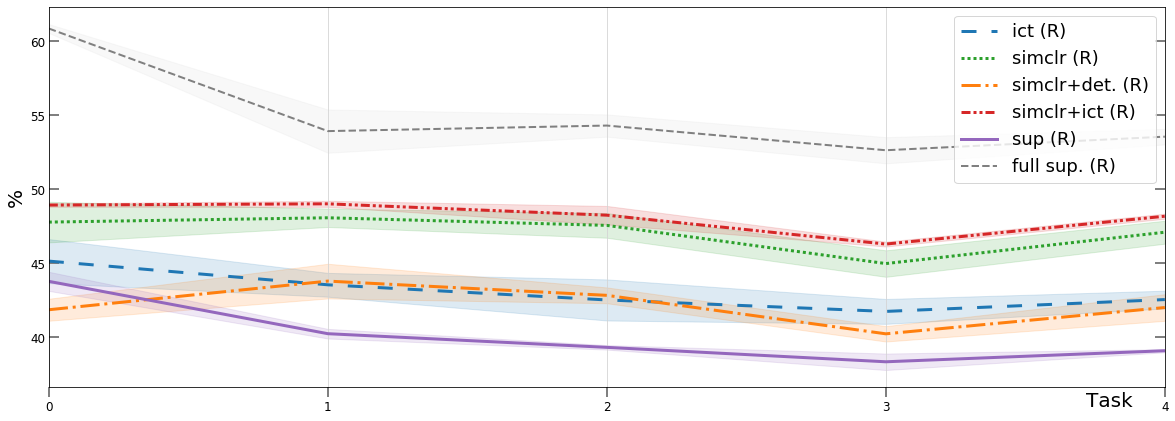

In [1702]:
fig = plt.figure(figsize=(20,7))
# Set up Axes
ax = fig.add_subplot(111)
x = np.arange(len(mean))
colors = (n for n in ['tab:blue','tab:green','tab:orange','tab:red','tab:purple'])
colors_={}
line = (n for n in [(0,(5,5)), (0,(1,1)), '-.', (0,(3,1,1,1,1,1)), '-'])
line_ = {}
for name in mean.columns:
    if '(R)' in name:
        c = next(colors)
        l = next(line)
        colors_[name[:-4]] = c
        line_[name[:-4]] = l
        ax.plot(x, mean[name], color=c, linestyle=l, label=name,linewidth=3)
        ax.fill_between(x, (mean[name]-std[name]), (mean[name]+std[name]), color=c, alpha=.15)

for name in mean_r1.columns:
    if '(R)' in name:
        ax.plot(x,mean_r1[name], color='grey', linestyle='--', label=name, linewidth=2)   
        ax.fill_between(x, (mean_r1[name]-std_r1[name]), (mean_r1[name]+std_r1[name]), color='lightgrey', alpha=.15)


ax.legend(fontsize=15)
ax.margins(x=0)
ax.set_ylabel('%', fontsize=20, color='black')
ax.set_xlabel('Task',fontsize=20, color='black')   
plt.xticks([0,1,2,3,4],fontsize=10, color='black') 
plt.yticks(fontsize=10, color='black') 
#ax.set_ylim([55,95])
ax.tick_params(axis='x', which='major', width = 2, color='grey',direction='out', length=10, labelsize=12)
ax.tick_params(axis='y', which='major', width = 2, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)


ax.grid(axis='x', color='lightgrey')
ax.legend(fontsize=18)
#sb.despine(left=True, bottom=True, right=True)
ax.xaxis.set_label_coords(0.95, -0.01)


In [1703]:
fig.savefig('/Users/oleksostapenko/Projects/SSCL/notebooks/plots/02/02_ewc.pdf', bbox_inches='tight', format='pdf', dpi=300)

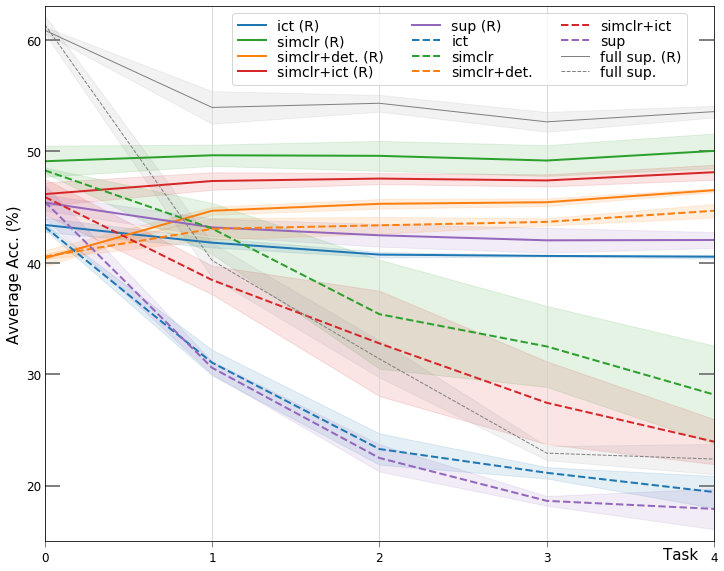

In [441]:
fig = plt.figure(figsize=(10,8))
# Set up Axes
ax = fig.add_subplot(111)
fig.tight_layout(pad=1.0)

# plot the same data on both axes
ax = plot_(mean_full, std_full,ax)
ax2 = None
# zoom-in / limit the view to different portions of the data
ax.set_ylim(15, 63)  # outliers only
# hide the spines between ax and ax2
ax.xaxis.tick_bottom()


ax.margins(x=0)
ax.set_ylabel('Avverage Acc. (%)', fontsize=15, color='black')
ax.set_xlabel('Task',fontsize=15, color='black') 

plt.xticks([0,1,2,3,4],fontsize=10, color='black') 
ax.tick_params(axis='x', which='major', width = 1, color='grey',direction='out', length=6, labelsize=12)
ax.tick_params(axis='y', which='major', width = 2, color='grey',direction='in', length=15, labelsize=12, right=True)#, labelright=True)

ax.grid(axis='x', color='lightgrey')
#ax.yaxis.set_major_locator(MaxNLocator(7, integer=True))

ax.legend(fontsize=14, ncol=3, labelspacing=0.1, bbox_to_anchor=(0.97, 1), loc='upper right')
#sb.despine(left=True, bottom=True, right=True)
ax.xaxis.set_label_coords(0.95, -0.01)

plt.show()


In [442]:
fig.savefig('/Users/oleksostapenko/Projects/SSCL/notebooks/plots/02_label_cont/02_lc.pdf', bbox_inches='tight', format='pdf', dpi=300)

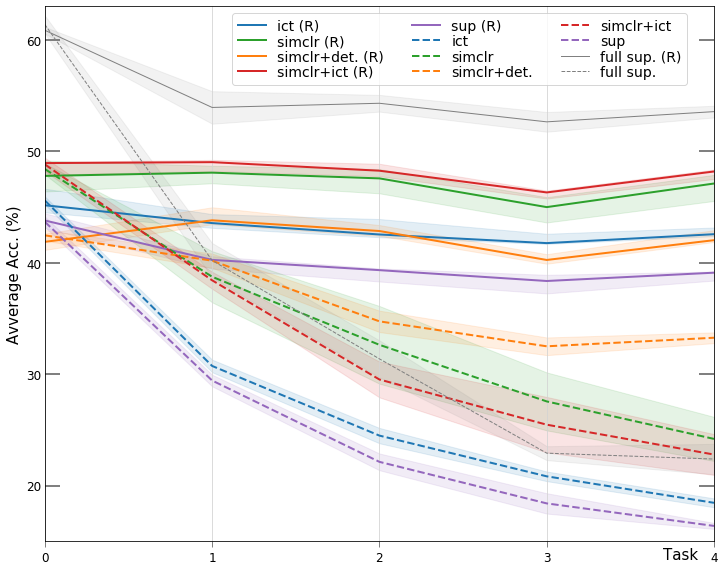

In [443]:
fig = plt.figure(figsize=(10,8))
# Set up Axes
ax = fig.add_subplot(111)
fig.tight_layout(pad=1.0)

# plot the same data on both axes
ax = plot_(mean, std,ax)
ax2 = None
# zoom-in / limit the view to different portions of the data
ax.set_ylim(15, 63)  # outliers only
# hide the spines between ax and ax2
ax.xaxis.tick_bottom()


ax.margins(x=0)
ax.set_ylabel('Avverage Acc. (%)', fontsize=15, color='black')
ax.set_xlabel('Task',fontsize=15, color='black') 

plt.xticks([0,1,2,3,4],fontsize=10, color='black') 
ax.tick_params(axis='x', which='major', width = 1, color='grey',direction='out', length=6, labelsize=12)
ax.tick_params(axis='y', which='major', width = 2, color='grey',direction='in', length=15, labelsize=12, right=True)#, labelright=True)

ax.grid(axis='x', color='lightgrey')
#ax.yaxis.set_major_locator(MaxNLocator(7, integer=True))

ax.legend(fontsize=14, ncol=3, labelspacing=0.1, bbox_to_anchor=(0.97, 1), loc='upper right')
#sb.despine(left=True, bottom=True, right=True)
ax.xaxis.set_label_coords(0.95, -0.01)

plt.show()


In [444]:
fig.savefig('/Users/oleksostapenko/Projects/SSCL/notebooks/plots/02/02_fc.pdf', bbox_inches='tight', format='pdf', dpi=300)

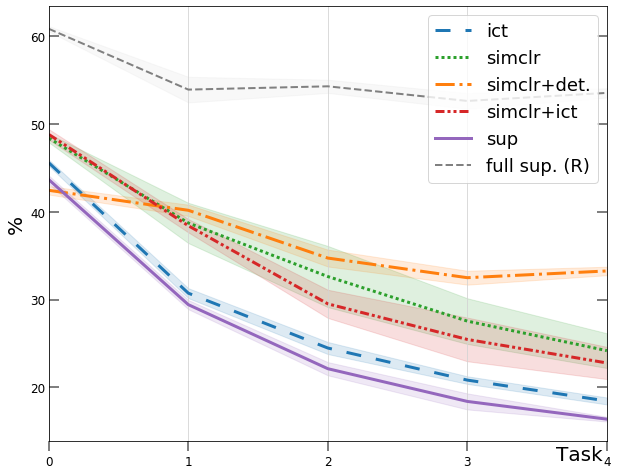

In [427]:
fig = plt.figure(figsize=(20,7))
# Set up Axes
ax = fig.add_subplot(111)
x = np.arange(len(mean))         
#colors = iter(cm.rainbow(np.linspace(0, 1, len(mean.columns))))
for name in mean.columns:
    if '(R)' not in name:
        c=colors_[name]
        l=line_[name]              
        ax.plot(x,mean[name], color=c, linestyle=l, label=name,linewidth=3) 
        ax.fill_between(x, (mean[name]-std[name]), (mean[name]+std[name]), color=c, alpha=.15)

        
for name in mean_r1.columns:
    if '(R)' in name:                
        ax.plot(x,mean_r1[name], color='grey', linestyle='--', label=name, linewidth=2)   
        ax.fill_between(x, (mean_r1[name]-std_r1[name]), (mean_r1[name]+std_r1[name]), color='lightgrey', alpha=.15)

ax.legend(fontsize=15)
ax.margins(x=0)
ax.set_ylabel('%', fontsize=20, color='black')
ax.set_xlabel('Task',fontsize=20, color='black')   
plt.xticks([0,1,2,3,4],fontsize=10, color='black') 
plt.yticks(fontsize=10, color='black') 
#ax.set_ylim([55,95])
ax.tick_params(axis='x', which='major', width = 2, color='grey',direction='out', length=10, labelsize=12)
ax.tick_params(axis='y', which='major', width = 2, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)


ax.grid(axis='x', color='lightgrey')
ax.legend(fontsize=18)
#sb.despine(left=True, bottom=True, right=True)
ax.xaxis.set_label_coords(0.95, -0.01)


In [1707]:
fig.savefig('/Users/oleksostapenko/Projects/SSCL/notebooks/plots/02/02_.pdf', bbox_inches='tight', format='pdf', dpi=300)

In [1708]:
data1 = pd.read_csv('cifar100/005_augm/full.csv')#.replace('undefined',0)
cols = [c for c in data1.columns if 'step' not in c and 'task' not in c]
data1= data1[cols]
data1.columns = [''.join([i for i in s.split('-')[0] if not i.isdigit() and not i==' ']) for s in data1.columns]
mean = data1.groupby(by=data1.columns, axis=1).mean()
std = data1.groupby(by=data1.columns, axis=1).std()

In [1709]:
data1 = pd.read_csv('cifar10/wandb_export_2020-06-01T16_27_59.048-04_00.csv')#.replace('undefined',0)
cols = [c for c in data1.columns if 'step' not in c and 'task' not in c]


In [1710]:
data1= data1[cols]
data1.columns = [''.join([i for i in s.split('-')[0] if not i.isdigit() and not i==' ']) for s in data1.columns]


In [1711]:
mean = data1.groupby(by=data1.columns, axis=1).mean()
std = data1.groupby(by=data1.columns, axis=1).std()

In [1712]:
mean.columns = ['ict','ict (R)','simclr','simclr (R)','simclr+det.','simclr+det. (R)','simclr+ict','simclr+ict (R)','sup','sup (R)']
std.columns = ['ict','ict (R)','simclr','simclr (R)','simclr+det.','simclr+det. (R)','simclr+ict','simclr+ict (R)','sup','sup (R)']


In [1713]:
mean*=100
std*=100

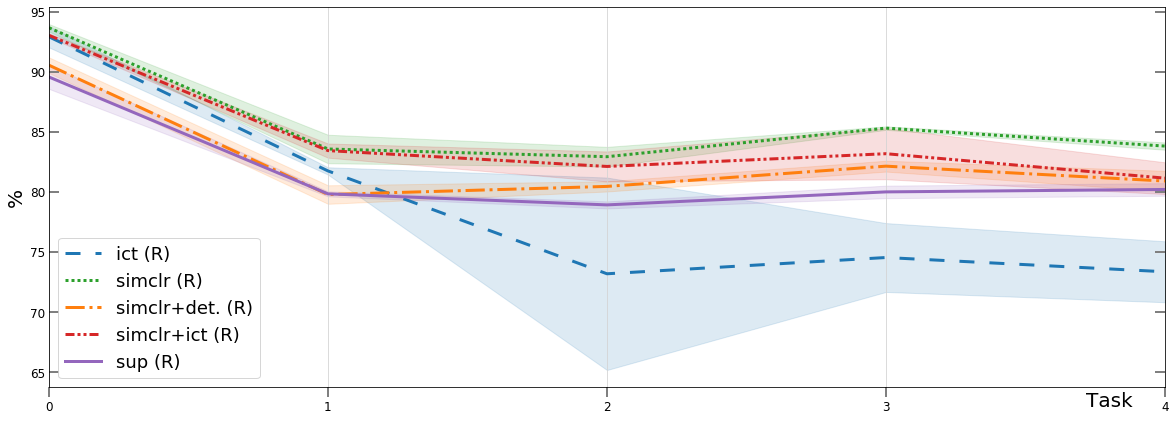

In [1716]:
fig = plt.figure(figsize=(20,7))
# Set up Axes
ax = fig.add_subplot(111)
x = np.arange(len(mean))
colors = (n for n in ['tab:blue','tab:green','tab:orange','tab:red','tab:purple'])
colors_={}
line = (n for n in [(0,(5,5)), (0,(1,1)), '-.', (0,(3,1,1,1,1,1)), '-'])
line_ = {}
for name in mean.columns:
    if '(R)' in name:
        c = next(colors)
        l = next(line)
        colors_[name[:-4]] = c
        line_[name[:-4]] = l
        ax.plot(x, mean[name], color=c, linestyle=l, label=name,linewidth=3)
        ax.fill_between(x, (mean[name]-std[name]), (mean[name]+std[name]), color=c, alpha=.15)

ax.legend(fontsize=15)
ax.margins(x=0)
ax.set_ylabel('%', fontsize=20, color='black')
ax.set_xlabel('Task',fontsize=20, color='black')   
plt.xticks([0,1,2,3,4],fontsize=10, color='black') 
plt.yticks(fontsize=10, color='black') 
#ax.set_ylim([55,95])
ax.tick_params(axis='x', which='major', width = 2, color='grey',direction='out', length=10, labelsize=12)
ax.tick_params(axis='y', which='major', width = 2, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)


ax.grid(axis='x', color='lightgrey')
ax.legend(fontsize=18)
#sb.despine(left=True, bottom=True, right=True)
ax.xaxis.set_label_coords(0.95, -0.01)


In [1717]:
fig.savefig('/Users/oleksostapenko/Projects/SSCL/notebooks/plots/005/005_cf10_reg.pdf', bbox_inches='tight', format='pdf', dpi=300)

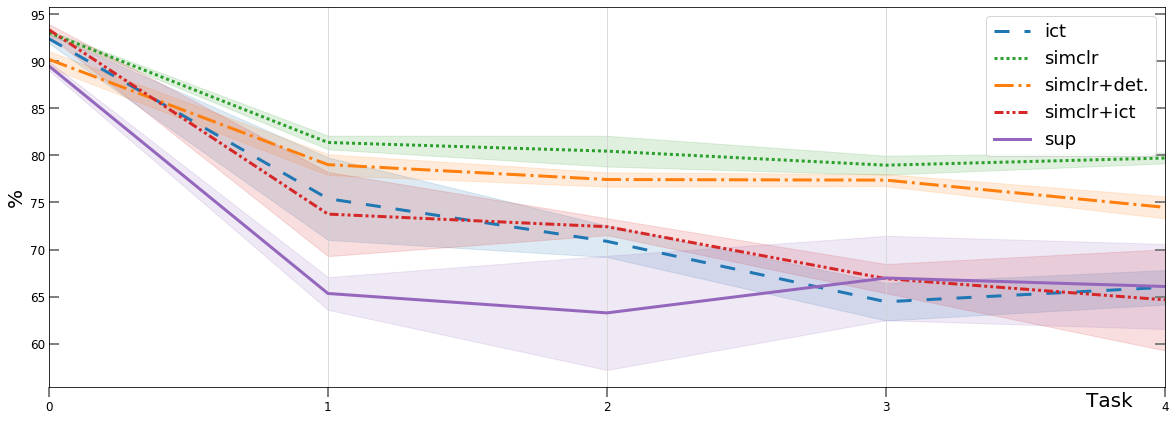

In [1718]:
fig = plt.figure(figsize=(20,7))
# Set up Axes
ax = fig.add_subplot(111)
x = np.arange(len(mean))         
#colors = iter(cm.rainbow(np.linspace(0, 1, len(mean.columns))))
for name in mean.columns:
    if '(R)' not in name:
        c=colors_[name]
        l=line_[name]              
        ax.plot(x,mean[name], color=c, linestyle=l, label=name,linewidth=3)            
        ax.fill_between(x, (mean[name]-std[name]), (mean[name]+std[name]), color=c, alpha=.15)

    
ax.legend(fontsize=15)
ax.margins(x=0)
ax.set_ylabel('%', fontsize=20, color='black')
ax.set_xlabel('Task',fontsize=20, color='black')   
plt.xticks([0,1,2,3,4],fontsize=10, color='black') 
plt.yticks(fontsize=10, color='black') 
#ax.set_ylim([55,95])
ax.tick_params(axis='x', which='major', width = 2, color='grey',direction='out', length=10, labelsize=12)
ax.tick_params(axis='y', which='major', width = 2, color='grey',direction='in', length=10, labelsize=12, right=True)#, labelright=True)


ax.grid(axis='x', color='lightgrey')
ax.legend(fontsize=18)
#sb.despine(left=True, bottom=True, right=True)
ax.xaxis.set_label_coords(0.95, -0.01)


In [1719]:
fig.savefig('/Users/oleksostapenko/Projects/SSCL/notebooks/plots/005/005_cf10.pdf', bbox_inches='tight', format='pdf', dpi=300)